# 06B. Brownian motion

### Mingyang Lu

### 2/12/2024

# Brownian motion in 1D

We consider a particle moving randomly along a line. The particle initially starts from the origin ($x(t=0)=0$). For every time step $t \rightarrow t + \Delta t$, the particle moves towards the left or right for a fixed step $\Delta x$ (*aka* move step). This is a typical Brownian motion in 1D, which we can write a stochastic simulation to model. Below shows two implementations of the simulation, one with a for loop (similar to ODE integration) and the other with only vector operations. The latter one is concise and elegant, but may not applicable to more complex situations. These two implementations generate essentially the same results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A simulation of Brownian motion in 1D
def brownian(t_total, dt, dx):
    """
    t_total: total simulation time
    dt: time step size
    dx: step size of the movement
    """
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)
  
    # Initial position at 0
    x_all[0] = 0   
    for i in range(1, n_all):
        x_all[i] = x_all[i - 1] + dx * np.random.choice([-1, 1])

    return np.column_stack((t_all, x_all))

# A simulation of Brownian motion in 1D (more concise version)
def brownian_concise(t_total, dt, dx):
    """
    t_total: total simulation time
    dt: time step size
    dx: step size of the movement
    """
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.cumsum(np.random.choice([-1, 1], size=n_all, replace=True)) * dx

    return np.column_stack((t_all, x_all))

For this example, we set $\Delta t = 1$ and $\Delta x = 1$. We perform the simulation of the 1D Brownian motion for 1000 times and plot the first ten time trajectories. 

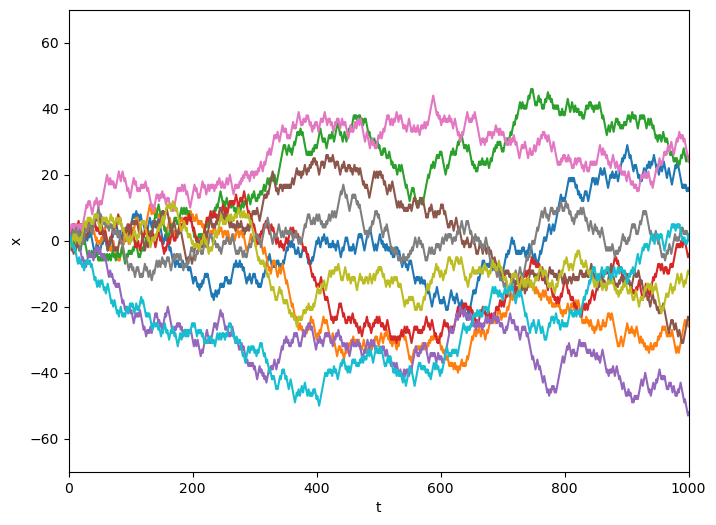

In [2]:
np.random.seed(12)
t_total = 1000
dt = 1
dx = 1
nrep = 1000  # total number of simulations
nplot = 10   # plot the first ten simulations

# Perform multiple simulations
results_bm_1d = np.array([brownian(t_total, dt, dx) for _ in range(nrep)])

# Plotting
plt.figure(figsize=(8, 6))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(0, 1000)
plt.ylim(-70, 70)

# Plot the first ten simulations
for i in range(nplot):
    plt.plot(results_bm_1d[i, :, 0], results_bm_1d[i, :, 1])

plt.show()

# Statistical evaluation of an ensemble of time trajectories

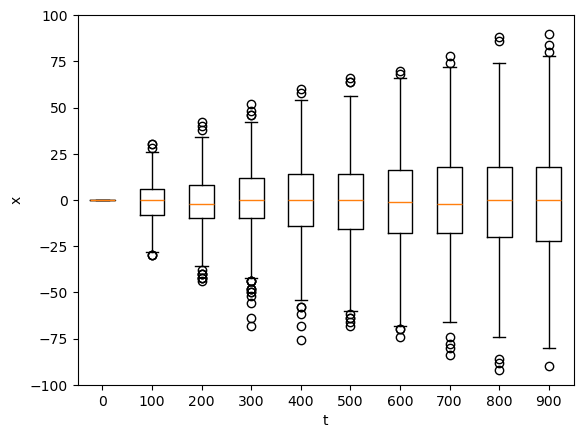

In [3]:
# Define time points to be evaluated
t_ind = np.arange(0, 1000, 100)
nt = len(t_ind)
data_bm_1d = np.zeros((nrep, nt))
for i in range(0,nt):
    data_bm_1d[:,i] = np.array(results_bm_1d[:,t_ind[i], 1]).reshape(-1)

plt.figure()
plt.boxplot(data_bm_1d)
plt.xlabel("t")
plt.ylabel("x")
plt.xticks(np.arange(1,nt+1), t_ind)
plt.ylim(-100, 100)
plt.show()

As shown in the box plot, the mean $x$ remains zero, and the variance of $x$ increases when $t$ increases. For each sample $t$, the distribution of $x$ is approximately a Gaussian. In fact, $P(x)$ is a binomial distribution and becomes Gaussian for a very large number of steps. Also see [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) for another explanation. The width of the Gaussian becomes larger for larger $t$. 

Q: is it okay to use larger $\Delta t$ in the simulation?

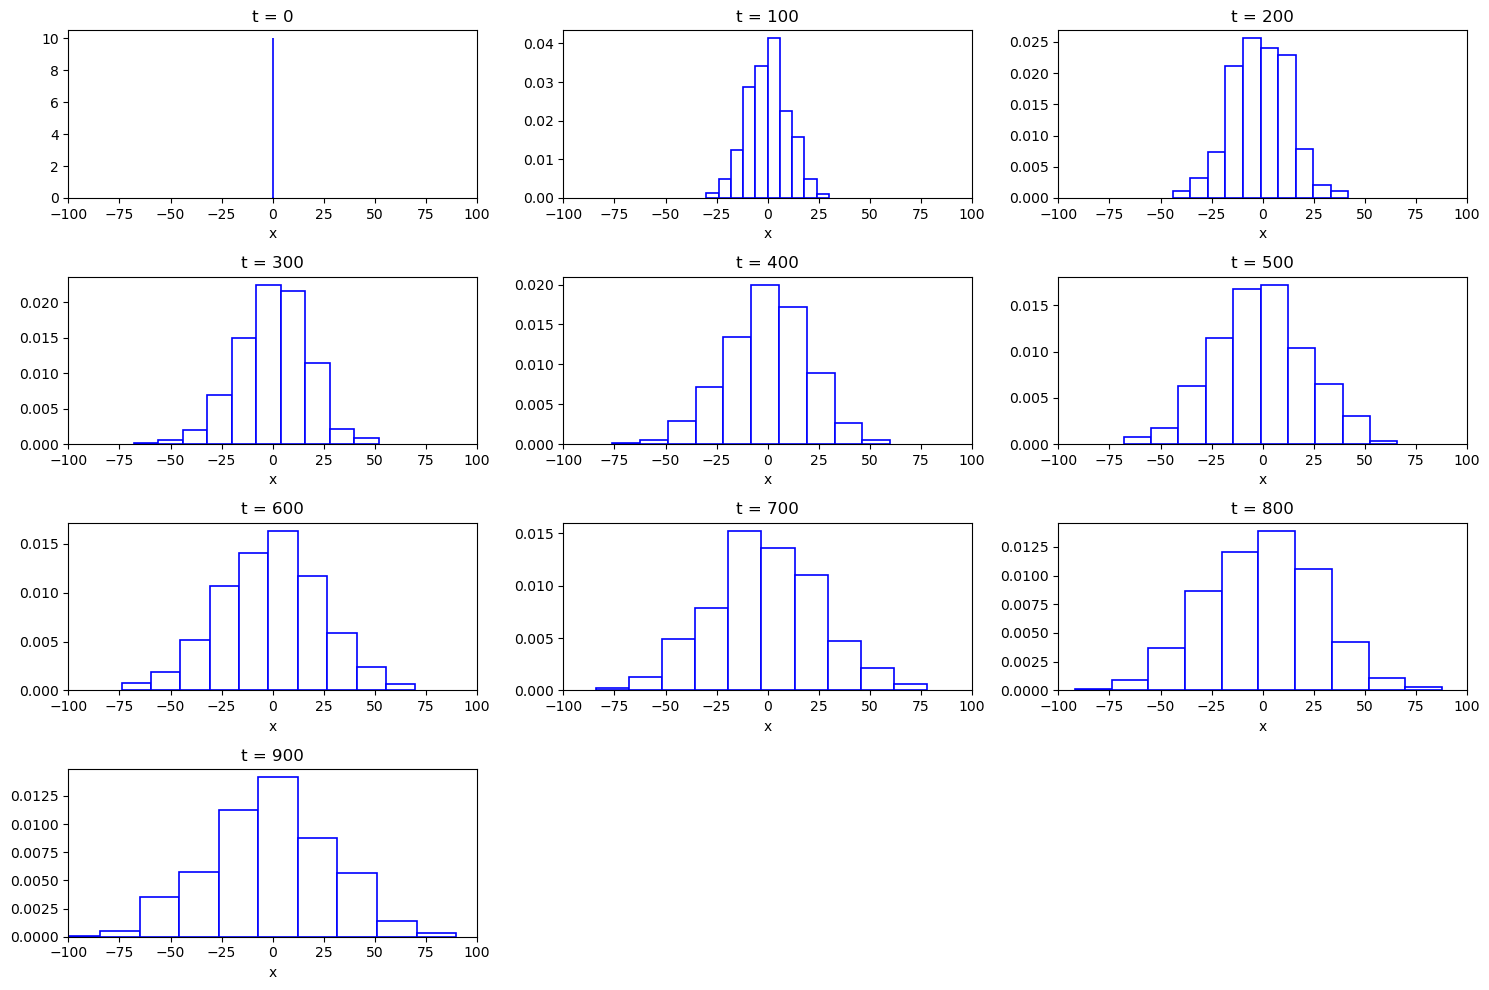

In [4]:
mean_x = np.zeros(nt)
var_x = np.zeros(nt)

# Define the layout
rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
ind = 0
for i in range(rows):
    for j in range(cols):
        if ind < nt:
            x = data_bm_1d[:,ind]
            axs[i, j].hist(x, bins=10, density=True, color = "w", edgecolor='b', linewidth=1.2)
            axs[i, j].set_xlabel("x")
            axs[i, j].set_xlim(-100, 100)
            axs[i, j].set_title(f"t = {t_ind[ind]}")
            mean_x[ind] = np.mean(x)
            var_x[ind] = np.mean(x ** 2)
            ind += 1
        else:
            axs[i, j].axis('off')  # Hide empty subplots if nt is smaller than 3*4

plt.tight_layout()
plt.show()

From the theory, we know that the variance $<x^2> = 2Dt$, where the diffusion constant for a one dimensional system:

$$D = \lim_{\Delta t \rightarrow 0}\frac{\Delta x^2}{2\Delta t}. \tag{3}$$ 

Using the many simulations, we can also compute the mean and variance of $x$ for different sampled $t$s. We roughly obtained $<x^2>  = t$, although there is still some slight deviations from the theory. In this case, $D = 0.5$. More simulations need to be performed to obtain better statistics.

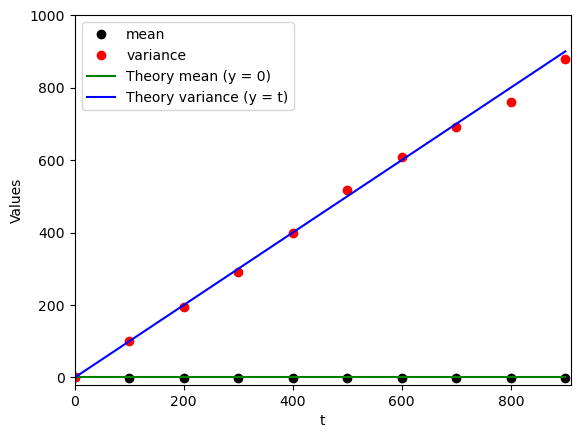

In [5]:
plt.plot(t_ind, mean_x, color='black', label='mean', linestyle='None', marker='o')
plt.plot(t_ind, var_x, color='red', label='variance', linestyle='None', marker='o')
plt.plot(t_ind, t_ind*0, color='green', label='Theory mean (y = 0)')
plt.plot(t_ind, t_ind, color='blue', label='Theory variance (y = t)')
plt.xlabel("t")
plt.ylabel("Values")
plt.xlim(0, 910)
plt.ylim(-20, 1000)
plt.legend(loc='upper left')
plt.show()

Q: how to confirm that slope of the curve $D = \frac{\Delta x^2}{2\Delta t}$ from the simulations of Brownian motions?

Next, instead of using discrete steps to model the Brownian motion, we draw move steps from a Gaussian distribution with the same mean (*.i.e.*, 0) and standard deviation (*i.e.*, 1).

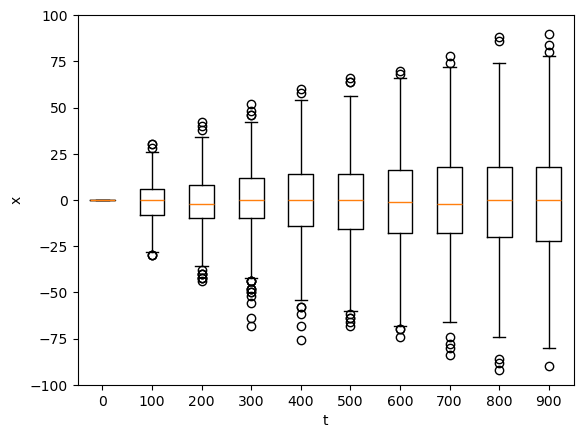

In [6]:
# A simulation of Brownian motion in 1D with Gaussian steps
def brownian_gaussian_steps(t_total, dt, dx):
    """
    t_total: total simulation time
    dt: time step size
    dx: step size of the movement (standard deviation of the Gaussian distribution)
    """
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)

    x_all[0] = 0  # initial position at 0
    for i in range(1, n_all):
        x_all[i] = x_all[i - 1] + np.random.normal(loc=0, scale=dx)

    return np.column_stack((t_all, x_all))

np.random.seed(12)
t_total = 1000
dt = 1
dx = 1
nrep = 1000  # total number of simulations

results_bm_1d_gaussian = np.array([brownian_gaussian_steps(t_total, dt, dx) for _ in range(nrep)])

# Plotting
t_ind = np.arange(0, 1000, 100)
nt = len(t_ind)
data_bm_1d = np.zeros((nrep, nt))
for i in range(0,nt):
    data_bm_1d[:,i] = np.array(results_bm_1d[:,t_ind[i], 1]).reshape(-1)

plt.figure()
plt.boxplot(data_bm_1d)
plt.xlabel("t")
plt.ylabel("x")
plt.xticks(np.arange(1,nt+1), t_ind)
plt.ylim(-100, 100)
plt.show()

There is no difference in the statistics from the new simulations when using Gaussian distributions to sample the move steps.

# Brownian motion in 2D

We can generalize the simulation to two dimensional Brownian motion. Here, we sample move steps from a Gaussian distribution. 

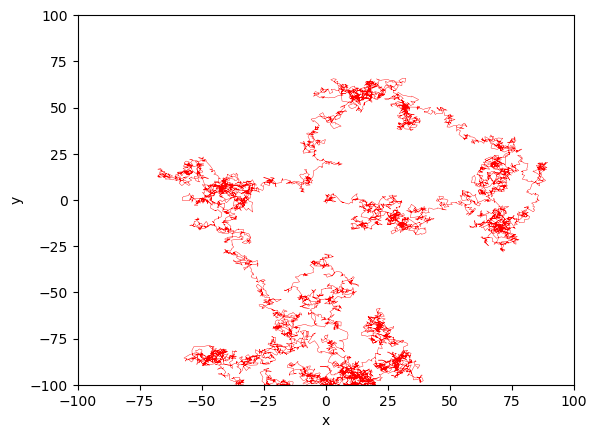

In [7]:
def brownian_2d(t_total, dt, dx):
    """
    t_total: total simulation time
    dt: time step size
    dx: a numeric vector of size two. Step size of the movement in x and y (standard deviation of the Gaussian distribution)
    """
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros((n_all, 2))

    x_all[0] = np.array([0, 0])  # initial position at (0,0)
    for i in range(1, n_all):
        step = np.random.normal(loc=0, scale=1, size=2) * dx
        x_all[i] = x_all[i - 1] + step

    return np.column_stack((t_all, x_all))

np.random.seed(17)
t_total = 10000
dt = 1
dx = np.array([1, 1])
results_bm_2d = brownian_2d(t_total, dt, dx)

plt.plot(results_bm_2d[:, 1], results_bm_2d[:, 2], color='red',linewidth=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

Q: think about how to evaluate the statistics of the system.

# Wiener process

A more precise description of the Brownian motion is by the Wiener process $W_t$, which has been widely used for modeling a continuous time stochastic process. A wiener process has the following properties:

**(1)** $W_0 = 0$

**(2)** $W$ has independent increments: for every $t >0$, the future increments $W_{t+h} - W_t$, are independent of the past values $W_s$, where $h\geq 0$ and $s <t$.

**(3)** $W$ has Gaussian increments: $W_{t+h} - W_t$ is normally distributed with mean 0 and variance $h$: $W_{t+h} - W_t \sim \mathcal{N}(0, h)$.

**(4)** $W$ has continuous paths: $W_t$ is continuous in $t$.

Our previous function *brownian_gaussian_steps* is essentially a Wiener process, as $\Delta t = 1$ and $sd(\Delta x) = 1$. We revise the function slightly for modeling a wiener process, where we input *dt* and the diffusion constant *D*.

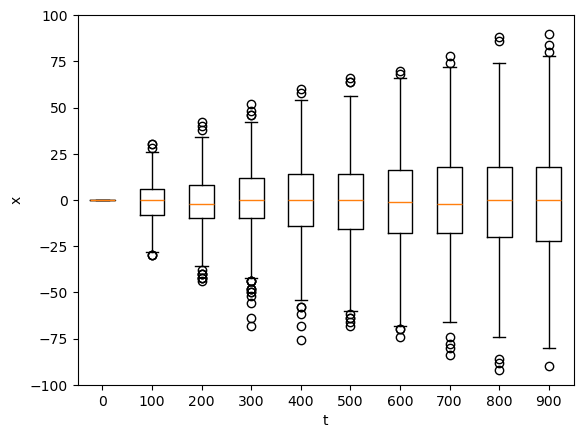

In [8]:
# A simulation of Brownian motion in 1D with for Wiener process
def brownian_wiener(t_total, dt, D):
    """
    t_total: total simulation time
    dt: time step size
    D: diffusion constant
    """
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)

    step = np.sqrt(2 * D * dt)  # this is critical! a common mistake is to take sd_dt = dt

    x_all[0] = 0  # initial position at 0
    for i in range(1, n_all):
        x_all[i] = x_all[i - 1] + np.random.normal(loc=0, scale=step)

    return np.column_stack((t_all, x_all))

np.random.seed(12)
t_total = 1000
dt = 10
D = 0.5
nrep = 1000  # total number of simulations

results_bm_1d_wiener = np.array([brownian_wiener(t_total, dt, D) for _ in range(nrep)])

# Plotting
t_ind = np.arange(0, 1000, 100)
nt = len(t_ind)
data_bm_1d = np.zeros((nrep, nt))
for i in range(0,nt):
    data_bm_1d[:,i] = np.array(results_bm_1d[:,t_ind[i], 1]).reshape(-1)

plt.figure()
plt.boxplot(data_bm_1d)
plt.xlabel("t")
plt.ylabel("x")
plt.xticks(np.arange(1,nt+1), t_ind)
plt.ylim(-100, 100)
plt.show()

Here, we use a much larger time step size $dt = 10$, but it works well (similar statistics) as long as we use move steps from a Gaussian distribution as described in the Wiener process. However, we usually still need to use a small time step size in stochastic simulations when there are other deterministic processes to be considered in a similar (similar to an ODE). We will introduce stochastic differential equation (SDE) next.